# LAB 06 - LinePlot


## 00 데이터 시각화 개요


## 1.  데이터의 패턴과 의미를 ‘눈으로 보게’ 만드는 과정
- 숫자·표 형태로는 보이지 않던 경향, 변화, 차이, 관계를 그래픽으로 변환해 직관적으로 이해하게 만드는 작업.

- 너무 화려하거나 복잡하면 오히려 데이터의 이해를 어렵게 한다.

## 2. 데이터 시각화의 목적
- 분석: 데이터 속 패턴·이상치·분포·상관관계 파악
- 설명: 분석 결과를 쉽게 전달
- 의사결정: 인사이트를 바탕으로 더 나은 선택을 가능하게 함

## 3. 데이터 시각화 구분

| 분류 | 설명 | 대표 목적 | 주로 사용하는 seaborn 함수 |
|------|------|-----------|-----------------------------|
| **시계열(Time-series)** | 시간의 흐름에 따라 값이 어떻게 변하는지 표현 | 추세/변동성/계절성 분석 | `lineplot()` |
| **분포(Distribution)** | 하나의 변수 값이 어떻게 퍼져 있는지 표현 | 패턴, 이상치, 형태(정규성) 확인 | `boxplot()`, `histplot()`, `kdeplot()`, `violinplot()`, `ecdfplot()` |
| **범주형(Categorical)** | 그룹 간 차이를 비교하거나 범주의 빈도 표현 | 집단 비교, 비율 분석 | `barplot()`, `countplot()`, `violinplot()`, `swarmplot()` |
| **관계(Relationship)** | 두 변수(연속형/범주형)의 관계를 표현 | 상관, 패턴, 경향성 파악 | `scatterplot()`, `regplot()`, `lineplot()`, `jointplot()` |
| **행렬(Matrix)** | 여러 변수의 조합을 표 형태로 표현하거나 상관을 열지도 형태로 시각화 | 변수 상관관계, 패턴 구조 파악 | `heatmap()`, `clustermap()` |
| **다변량(Multivariate)** | 3개 이상의 변수 간 관계를 한 번에 확인 | 고차원 구조 탐색, 분포·관계 종합 분석 | `pairplot()`, `jointplot()`, `FacetGrid()`, `catplot()`, `relplot()` |



## 4. 데이터 시각화에 필요한 주요 객체

- **기본형**: matplotlib만 사용  
- **응용형태**: matplotlib + pandas(DataFrame)  
- **확장형**: matplotlib + seaborn  

| 개념 | 비유 | 이유 |
|------|------|------|
| **Figure** | 큰 캔버스·화판 | 전체 그림을 담는 공간 |
| **Axes** | 개별 작업 구역(스케치북 페이지) | 그래프가 실제로 그려지는 공간 |
| **matplotlib 기본 함수** | 기본 붓·연필 | 전부 직접 컨트롤, 자유도 높음 |
| **seaborn** | 고급 붓·전문 도구 세트 | 기본 스타일링·색감·레이아웃 자동화 |


### #01.준비 작업
#### 1.1 라이브러리 참조
- matplotlib ,seaborn 패키지가 설치되어야 한다

In [6]:
from hossam import load_data

#글꼴을 시스템에 등록
from matplotlib import font_manager as fm

#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt

#고급 그래픽 기능 제공
import seaborn as sb

#### 1.2.시스템 전역 설정

In [9]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'

#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)

#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)

#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#글꼴 이름 확인
font_name

'Noto Sans KR'

#### 1.3.그래프 설정
- 하단의 코드는 ipynb 파일 하나당 한번만 수행하면 된다
- 이와 같은 형식의 코드가 다시 실행되기 전까지, 현재 소스 파일의 모든 그래프에 전역으로 적용되는 설정
- theme 종류 : whitegrid , darkgrid , dark , white 


In [11]:
#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 

#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'

#그림 스타일 지정
my_theme = 'dark'

#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)


#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### #02.그래프 기본 코드 구성
- 캔버스와 도화지 준비하는 작업


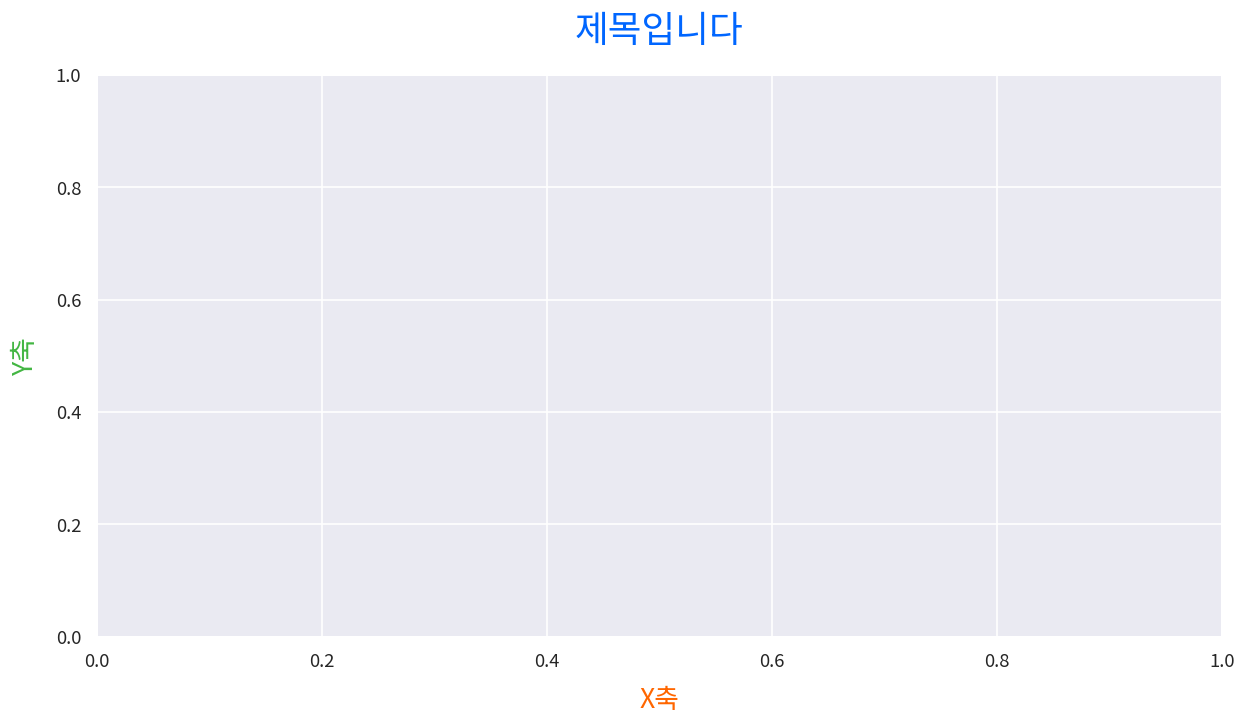

In [22]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)

#그래프의 도화지 상태 확인용 테스트 코드
# print(ax)

#2) 그래프 그리기 > seaborn 사용


#3) 그래프 꾸미기 > 도화지 ax 에 직접 적용
# color : 글자 색상 (기본값은 black)
# fontsize : 글자크기
# pad ,labelpad :그래프와의 간격
# fontweight 글자 굵기

ax.set_title('제목입니다',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)



#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### #03.Line Plot
- 라인 플롯은 하나의 변수가 시간의 흐름이나 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용한다

#### 3-1.기본 그리기
- 그래프에 표시괼 데이터를 리스트 등의 연속형 자료형으로 지정한다
- 값은 y축이 되고 인덱스는 x 축이 된다

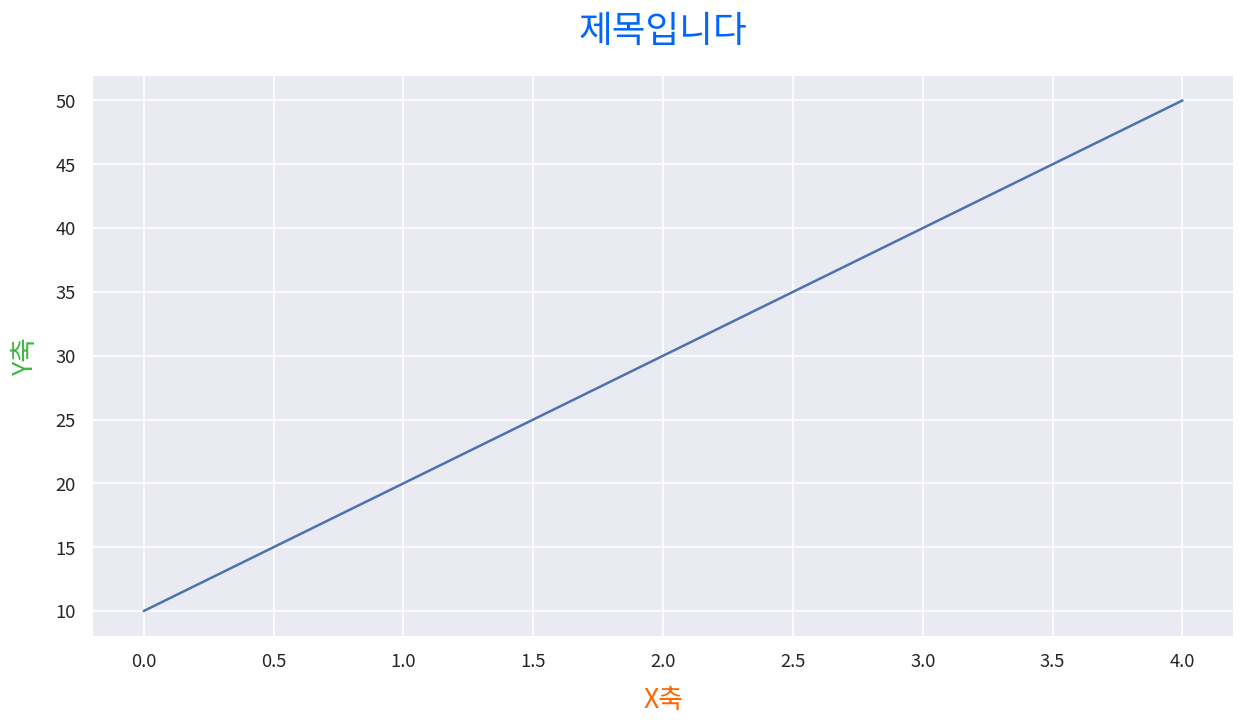

In [23]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (기본 구성에서 추가된 항목)
sb.lineplot([10,20,30,40,50]) #인덱스가 x 축, 리스트 값이 y 축

#3) 그래프 꾸미기 : 생략

ax.set_title('제목입니다',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)



#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 3-2.x,y 축 및 선 모양 지정하기
- x축과 y 축에 모두 리스트 지정

| 파라미터 이름      | 파라미터 약자 | 의미          |
|--------------------|----------------|---------------|
| color              | c              | 선 색깔       |
| linestyle          | ls             | 선 스타일     |
| linewidth          | lw             | 선 굵기       |
| marker             |                | 마커 종류     |
| markersize         | ms             | 마커 크기     |
| markerfacecolor    | mfc            | 마커 내부 색깔 |
| markeredgecolor    | mec            | 마커 선 색깔   |
| markeredgewidth    | mew            | 마커 선 굵기   |


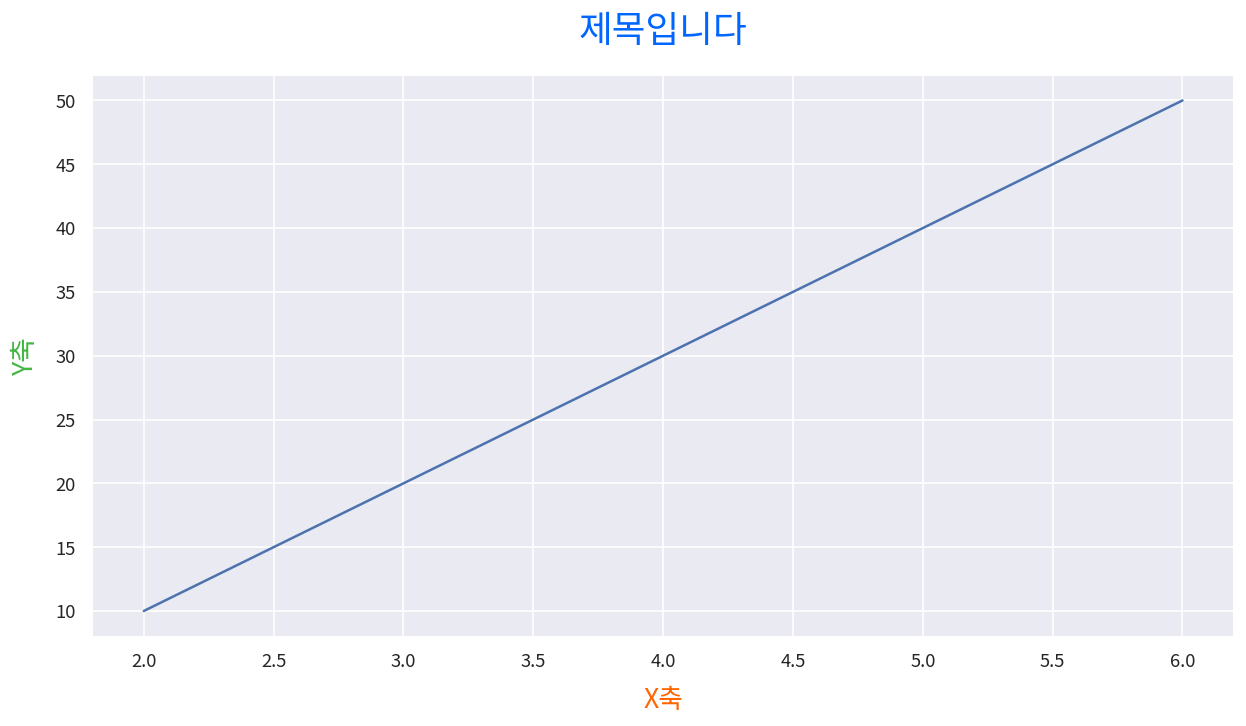

In [24]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (기본 구성))
sb.lineplot(x=[2,3,4,5,6], y=[10,20,30,40,50]) 

#3) 그래프 꾸미기 : 생략

ax.set_title('제목입니다',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)



#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

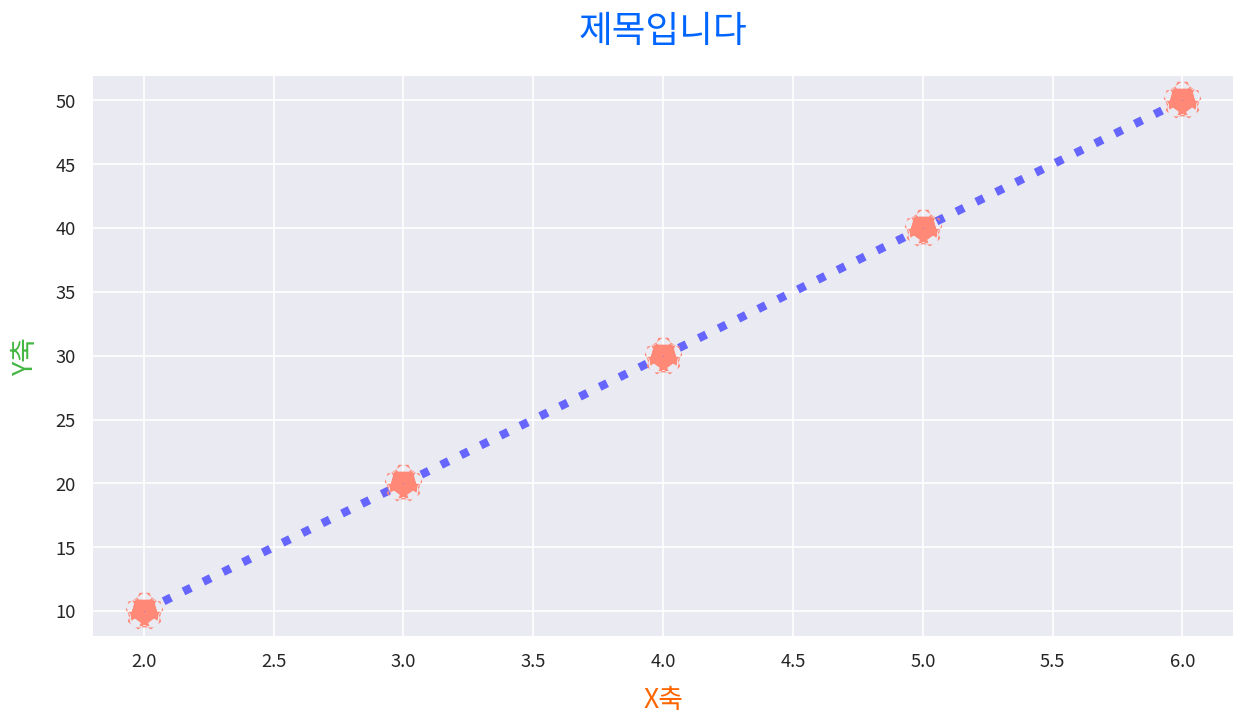

In [31]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 적용 / 약자 사용 가능)

sb.lineplot(x=[2,3,4,5,6], y=[10,20,30,40,50],color = '#66ff',ls=':',lw=5,marker = '*',mec='#ff8877',mew=20
) 

#3) 그래프 꾸미기 : 생략

ax.set_title('제목입니다',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)



#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

## [1] 선 스타일

| 선 스타일 문자형 | 의미               |
|------------------|--------------------|
| -                | 실선(solid)        |
| --               | 대시선(dashed)     |
| :                | 점선(dotted)       |
| -.               | 대시-점선(dash-dot) |



## [2] 마커

데이터 위치를 나타내는 기호를 마커(marker)라고 한다.  
마커의 종류는 다음과 같다.

| 마커 문자형 | 의미                 |
|-------------|-----------------------|
| .           | point marker          |
| ,           | pixel marker          |
| o           | circle marker         |
| v           | triangle_down marker  |
| ^           | triangle_up marker    |
| <           | triangle_left marker  |
| >           | triangle_right marker |
| 1           | tri_down marker       |
| 2           | tri_up marker         |
| 3           | tri_left marker       |
| 4           | tri_right marker      |
| s           | square marker         |
| p           | pentagon marker       |
| *           | star marker           |
| h           | hexagon1 marker       |
| H           | hexagon2 marker       |
| +           | plus marker           |
| x           | x marker              |
| D           | diamond marker        |
| d           | thin_diamond marker   |


#### 3-3.축 범위 설정
- 그래프 꾸미기 영역에서 x 축과 y 축 범위 설정 가능

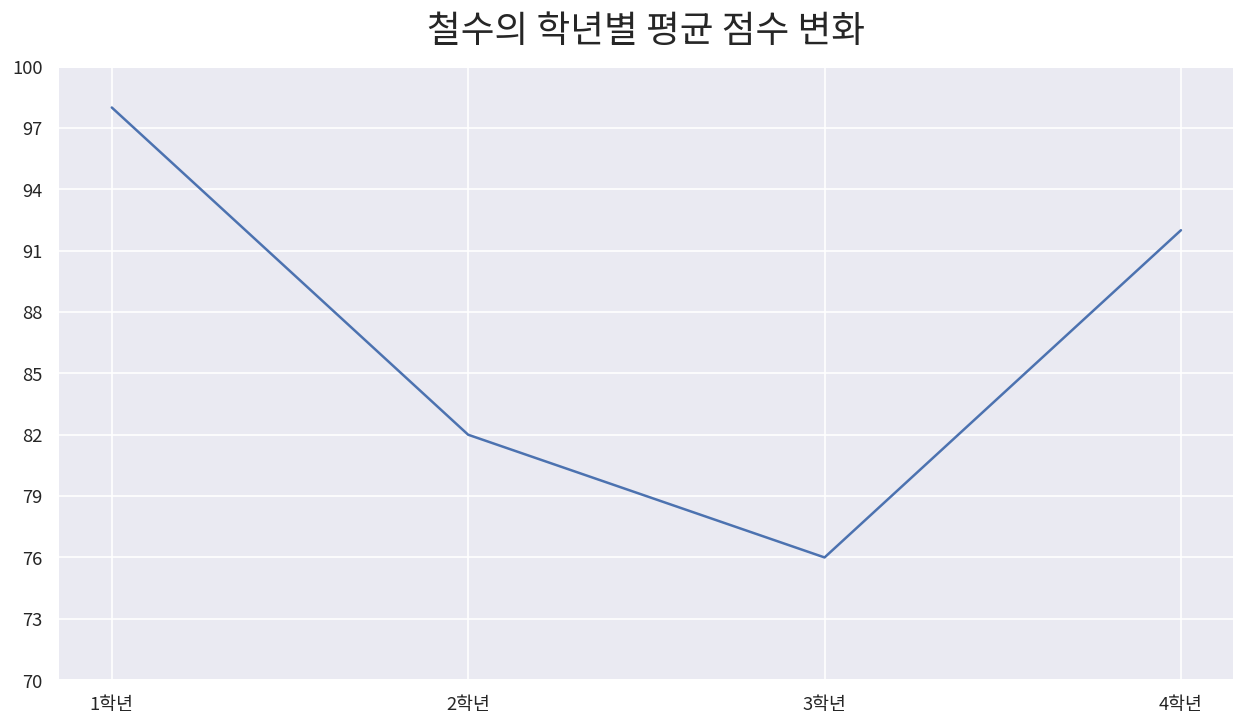

In [34]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 생략)

sb.lineplot(x=[1,2,3,4], y=[98,82,76,92]) 

#3) 그래프 꾸미기 (x)
ax.set_title('철수의 학년별 평균 점수 변화',pad=15,fontsize=22)

#x 축 좌표에 표시할 문자열 지정
ax.set_xticks([1,2,3,4],['1학년','2학년','3학년','4학년'])
ax.set_yticks(range(70,101,3),range(70,101,3))

#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 3-4. 각 축의 표시 내용 설정

In [ ]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 생략)

sb.lineplot(x=[1,2,3,4], y=[98,82,73,92]) 

#3) 그래프 꾸미기 (x)
ax.set_xlim([-5,10])
ax.set_ylim([0,60])

#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### 4. 다중 선 그래프

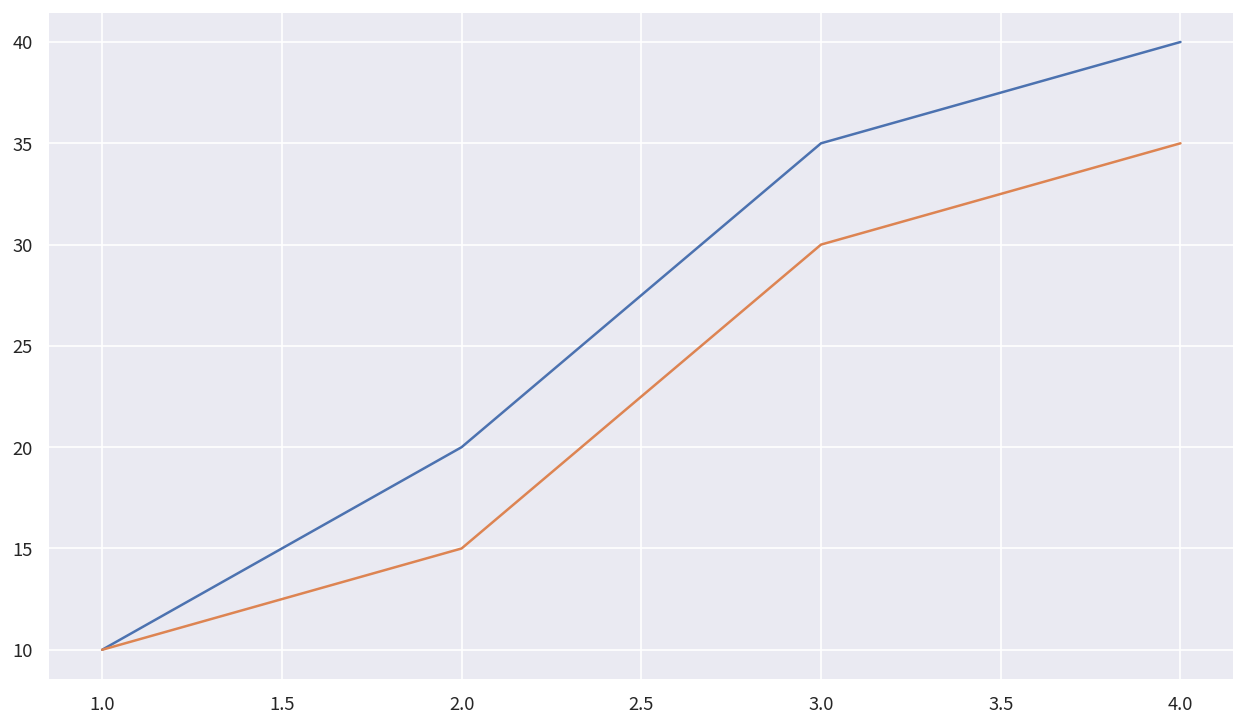

In [36]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 생략)

sb.lineplot(x=[1,2,3,4], y=[10,20,35,40]) 
sb.lineplot(x=[1,2,3,4], y=[10,15,30,35]) 

#3) 그래프 꾸미기 (생략)
#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### 5. 예제 : 교통사고 발생건수 시각화
#### 5-1 데이터 가져오기

In [37]:
origin = load_data('traffic_acc')
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


#### 5-2 데이터 전처리

In [38]:
#기존 데이터를 토대로 월 행은 없애고,년도별 평균을 구한다
df = origin.drop('월',axis =1).groupby('년도').mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


#### 5-3 교통사고 발생자 수 변화

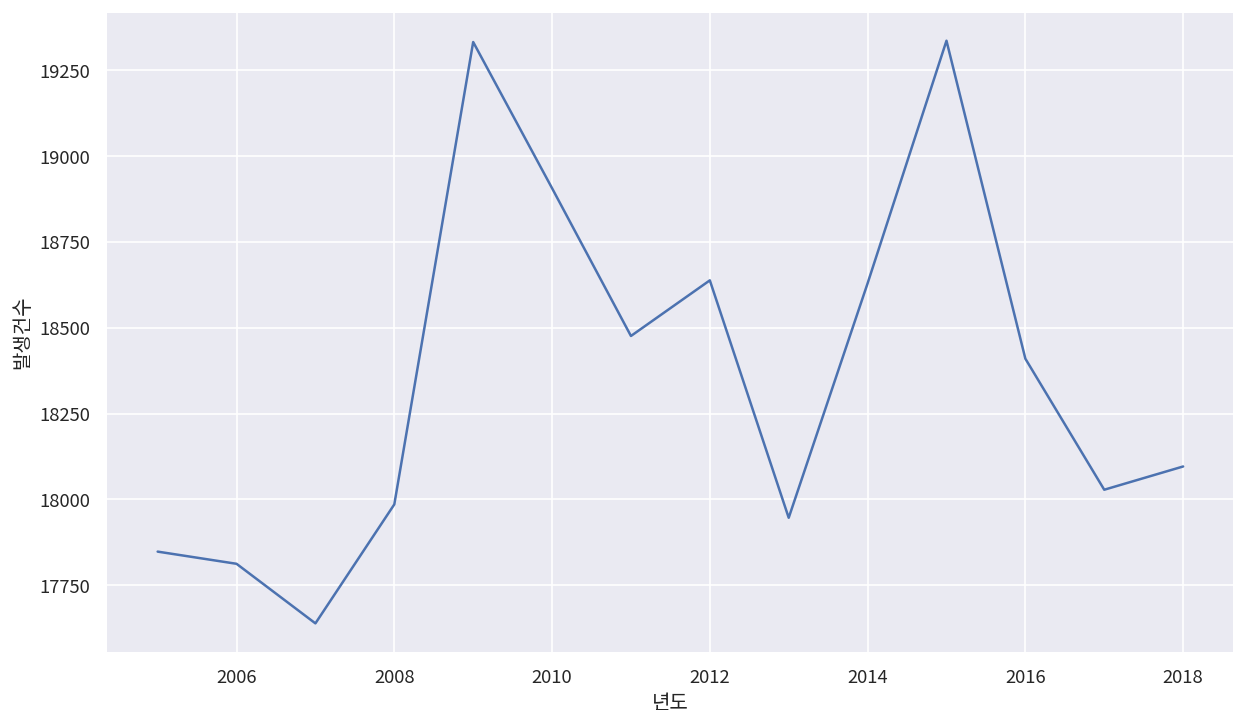

In [39]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 생략)

sb.lineplot(data=df , x=df.index, y='발생건수') 


#3) 그래프 꾸미기 (생략)
#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료